# Purpose

The purpose of this notebook is to look into the basic information of the Spotify dataset

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import os
from scipy import stats
import itertools

In [2]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

## Prepping Data

In [3]:
data = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet')
data.drop(columns = ['Artist Id', 'Album Id', 'Track Id', 'Event Unixtime', 'Artist', 'Album', 'Track', 'Key', 'Mode', 'Time Signature'], inplace = True)
data = data[data['Valence'].isna() == False]
data

,Age,Education Level,User Id,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms
2,16,HS,15397460,0.442,0.739,-5.619,0.0384,0.014800,0.154000,0.3680,0.112,134.019,252427.0
3,16,HS,15397460,0.316,0.944,-4.815,0.1740,0.000066,0.000000,0.1050,0.407,180.104,185400.0
4,16,HS,15397460,0.496,0.962,-4.482,0.2280,0.000018,0.000000,0.3330,0.552,139.956,191200.0
5,16,HS,15397460,0.371,0.341,-9.475,0.0319,0.570000,0.000031,0.1010,0.196,89.038,367133.0
6,16,HS,15397460,0.519,0.964,-5.148,0.2010,0.000763,0.000000,0.2020,0.381,94.981,241000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37096507,16,HS,47574621,0.513,0.858,-5.383,0.0423,0.001110,0.000000,0.3590,0.555,100.076,250880.0
37096509,16,HS,47574621,0.573,0.954,-4.210,0.0715,0.003030,0.000000,0.3490,0.755,94.995,237907.0
37096510,16,HS,47574621,0.487,0.742,-4.788,0.0355,0.000203,0.000000,0.1180,0.174,142.016,262667.0
37096512,16,HS,47574621,0.317,0.988,-2.848,0.2100,0.003810,0.013900,0.3170,0.184,169.296,167916.0


## Graphs

### Education Level

In [4]:
graphData = data.groupby(['Education Level', 'User Id'], observed = True).agg('mean').reset_index()
graphData

,Education Level,User Id,Age,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms
0,HS,3856459,17,0.593373,0.679299,-7.294417,0.062919,0.206142,0.133156,0.184668,0.538471,125.526476,224579.030119
1,HS,4116740,16,0.427292,0.766354,-6.874165,0.072866,0.109197,0.320602,0.214407,0.376366,123.890371,278045.769337
2,HS,4553514,17,0.564251,0.707613,-7.288480,0.114427,0.205071,0.091321,0.224258,0.550135,122.061869,214176.393498
3,HS,4564155,17,0.578391,0.734435,-7.088937,0.072201,0.111897,0.317786,0.215022,0.414628,127.236809,265212.999537
4,HS,5055395,17,0.523343,0.679589,-6.575318,0.061893,0.229938,0.054401,0.209050,0.433053,122.836172,227333.223327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,MS,50002977,14,0.554149,0.747826,-5.162426,0.067373,0.105017,0.000178,0.240212,0.485162,112.453646,217924.558974
3408,MS,50023120,13,0.475474,0.848667,-4.832381,0.077497,0.055187,0.020558,0.211941,0.468344,132.929118,214811.981337
3409,MS,50056395,14,0.434621,0.812736,-7.116517,0.088229,0.080196,0.434892,0.240784,0.366305,124.139632,289821.287356
3410,MS,50067254,14,0.575168,0.778509,-5.922716,0.113573,0.093188,0.114695,0.189867,0.579214,123.518084,234707.042105


#### Just significant

MS -> HS: Ttest_indResult(statistic=4.537509947203419, pvalue=5.8919565997504605e-06)


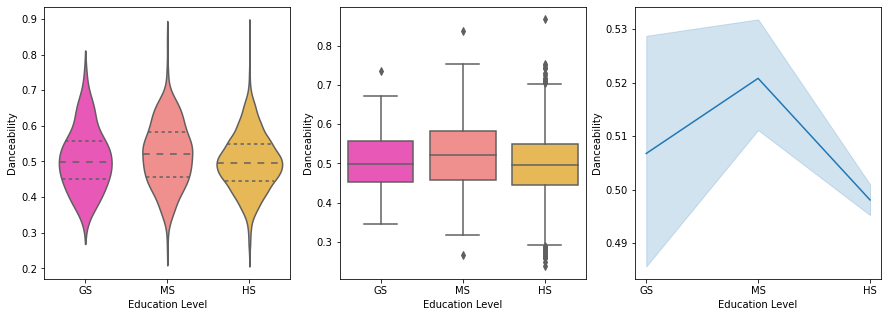

GS -> MS: Ttest_indResult(statistic=-4.132517500650272, pvalue=4.531968069833717e-05)


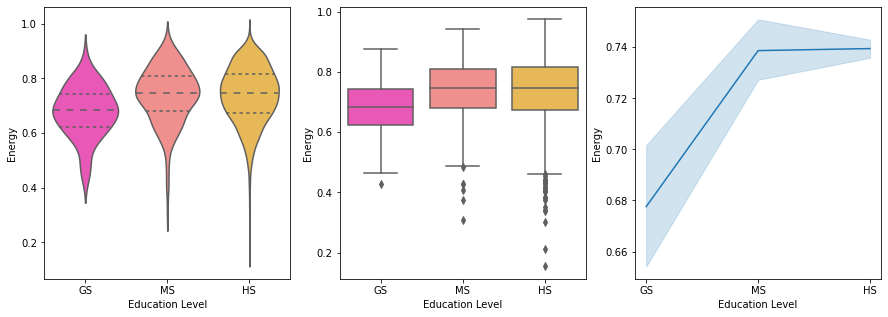

GS -> MS: Ttest_indResult(statistic=-6.603681236930586, pvalue=1.5626289907093876e-10)


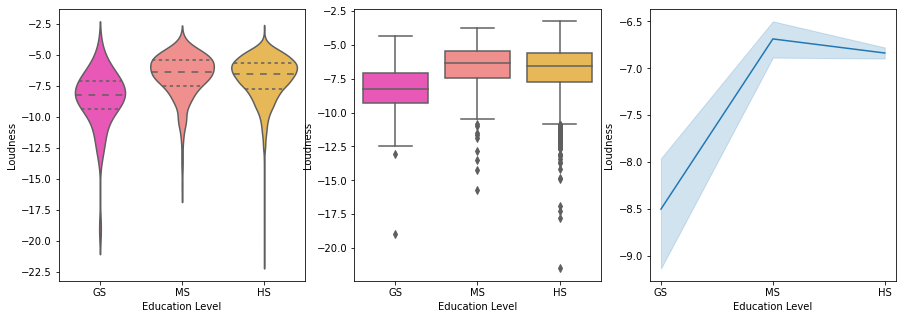

GS -> MS: Ttest_indResult(statistic=3.1725586571266704, pvalue=0.001650022802034901)


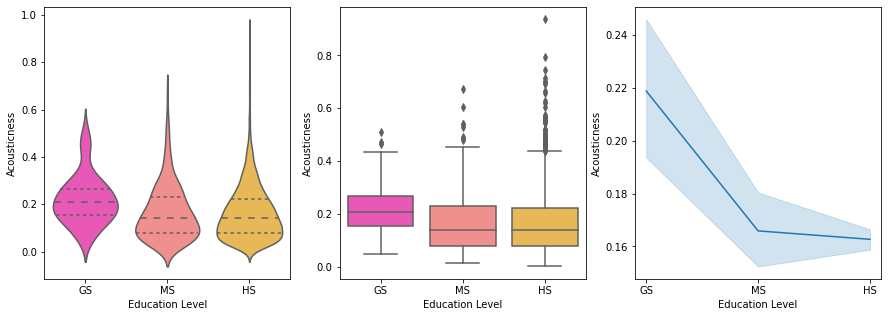

GS -> MS: Ttest_indResult(statistic=5.4651967841060225, pvalue=9.009282951245092e-08)


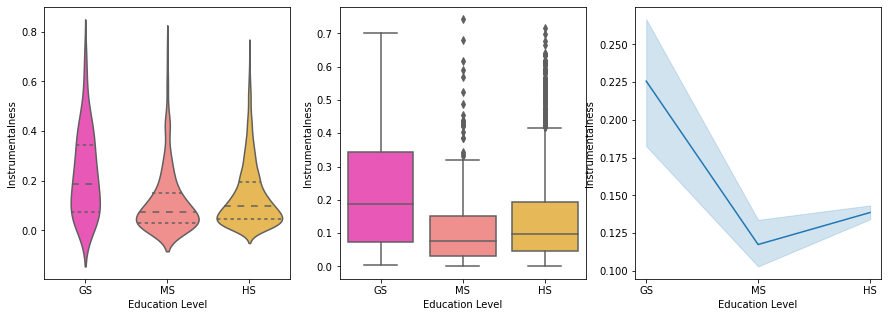

MS -> HS: Ttest_indResult(statistic=3.400312008592265, pvalue=0.0006809587970433527)


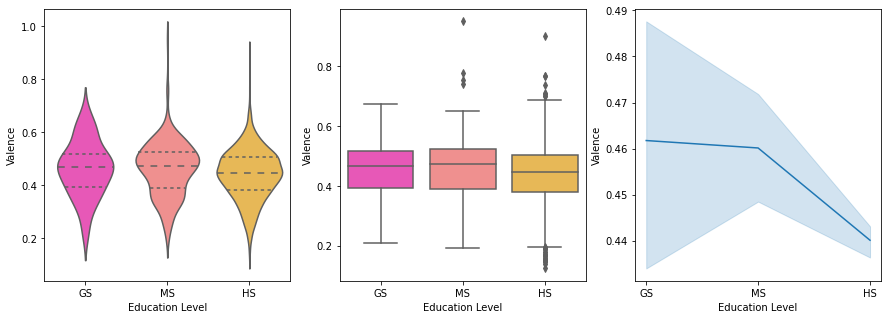

GS -> MS: Ttest_indResult(statistic=-3.138808022928867, pvalue=0.0018462054075928617)


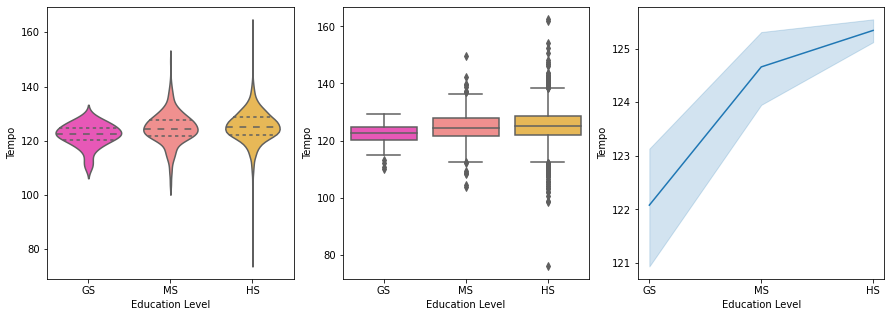

In [5]:
for column in graphData.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    significant = False
    for (x, y) in pairwise(graphData['Education Level'].cat.categories):
        t = stats.ttest_ind(graphData[graphData['Education Level'] == x][column], graphData[graphData['Education Level'] == y][column])
        if (t.pvalue <= .005):
            significant = True
            
    if (significant == False):
        continue
    
    for (x, y) in pairwise(graphData['Education Level'].cat.categories):
        t = stats.ttest_ind(graphData[graphData['Education Level'] == x][column], graphData[graphData['Education Level'] == y][column])
        if (t.pvalue <= .005):
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Education Level', y = column, inner = 'quartile', data = graphData, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Education Level', y = column, data = graphData, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Education Level', y = column, data = graphData, ax = axs[2], palette='spring')
    plt.show();

#### All

GS -> MS: Ttest_indResult(statistic=-1.0877297172194866, pvalue=0.27749176231432565)
***MS -> HS: Ttest_indResult(statistic=4.537509947203419, pvalue=5.8919565997504605e-06)


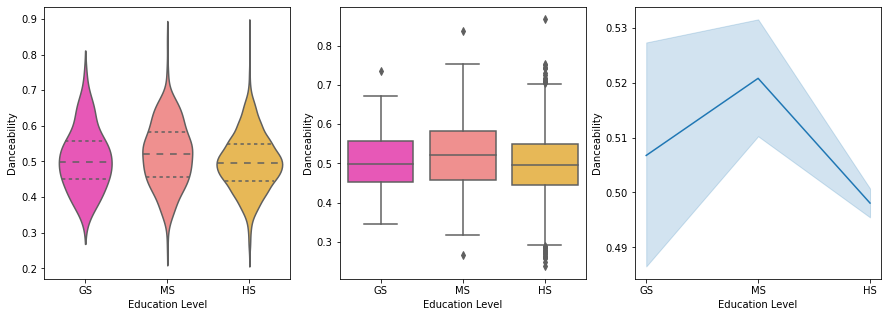

***GS -> MS: Ttest_indResult(statistic=-4.132517500650272, pvalue=4.531968069833717e-05)
MS -> HS: Ttest_indResult(statistic=-0.12546312148926297, pvalue=0.9001644407019758)


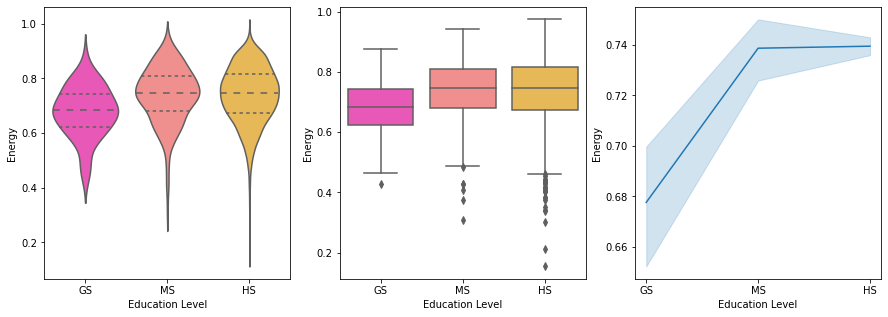

***GS -> MS: Ttest_indResult(statistic=-6.603681236930586, pvalue=1.5626289907093876e-10)
MS -> HS: Ttest_indResult(statistic=1.3981803205944663, pvalue=0.16215139879498736)


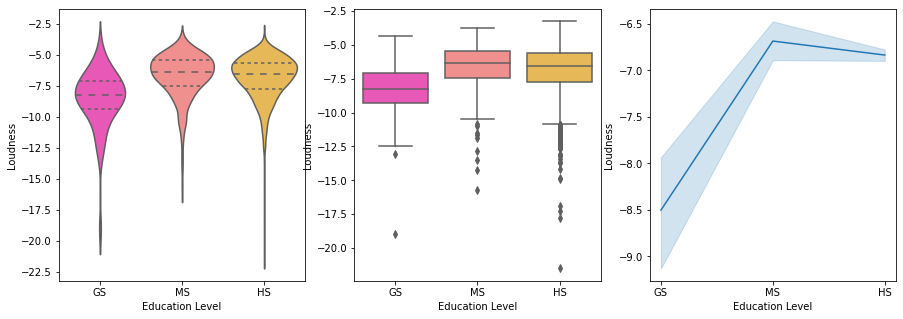

GS -> MS: Ttest_indResult(statistic=-1.1129655887560277, pvalue=0.2665164514850045)
MS -> HS: Ttest_indResult(statistic=0.6244524852158416, pvalue=0.5323729514504761)


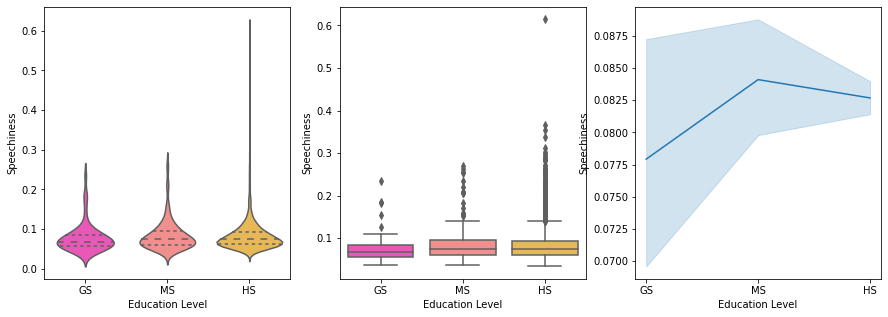

***GS -> MS: Ttest_indResult(statistic=3.1725586571266704, pvalue=0.001650022802034901)
MS -> HS: Ttest_indResult(statistic=0.4621576937020509, pvalue=0.6439982247308187)


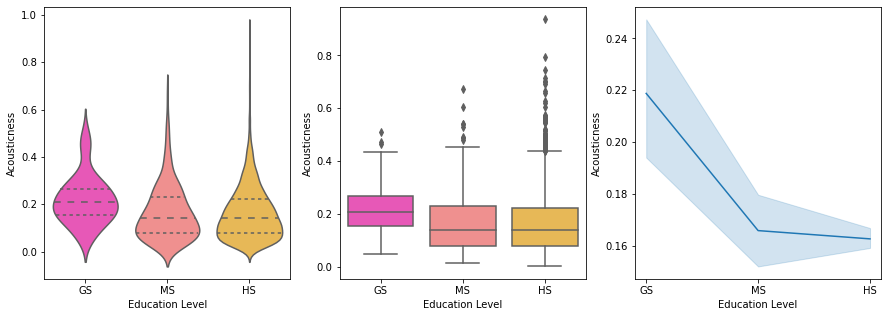

***GS -> MS: Ttest_indResult(statistic=5.4651967841060225, pvalue=9.009282951245092e-08)
MS -> HS: Ttest_indResult(statistic=-2.685627042356087, pvalue=0.007275050532510781)


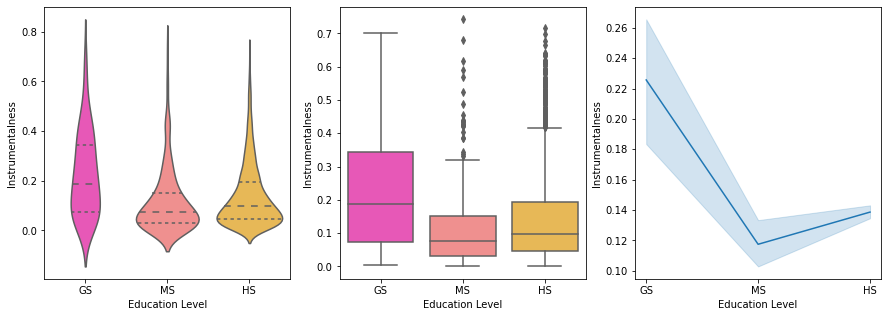

GS -> MS: Ttest_indResult(statistic=-1.4221626471962867, pvalue=0.15590390984218025)
MS -> HS: Ttest_indResult(statistic=0.2850944222101917, pvalue=0.7755894110885843)


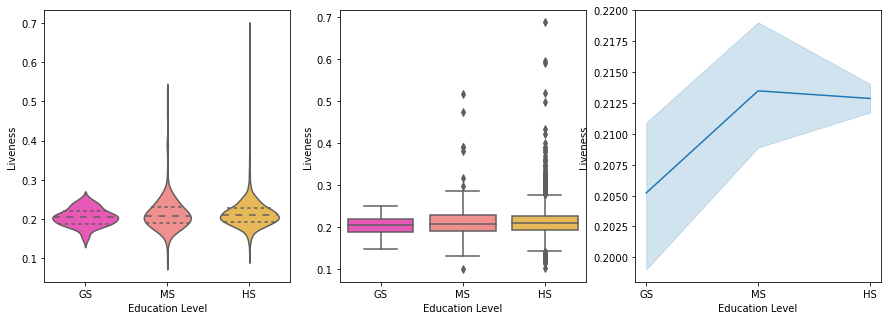

GS -> MS: Ttest_indResult(statistic=0.10842537669156424, pvalue=0.9137227990526661)
***MS -> HS: Ttest_indResult(statistic=3.400312008592265, pvalue=0.0006809587970433527)


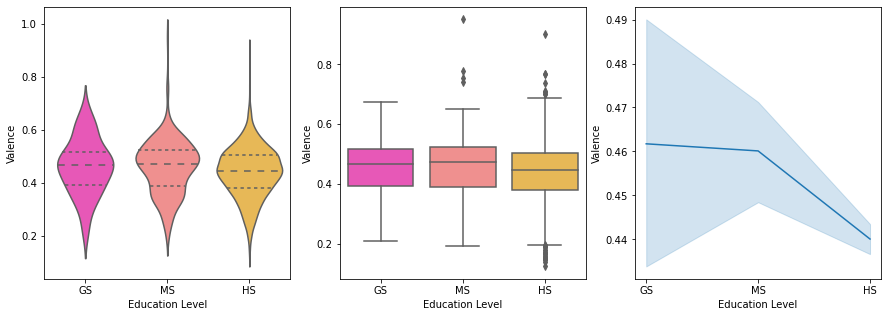

***GS -> MS: Ttest_indResult(statistic=-3.138808022928867, pvalue=0.0018462054075928617)
MS -> HS: Ttest_indResult(statistic=-1.8774911068161464, pvalue=0.06053755731348672)


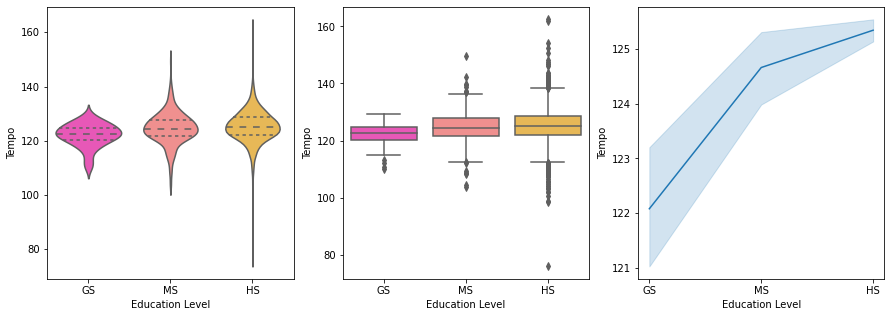

GS -> MS: Ttest_indResult(statistic=2.0577575277530107, pvalue=0.04038222679266141)
MS -> HS: Ttest_indResult(statistic=-1.09463815288858, pvalue=0.2737538193396025)


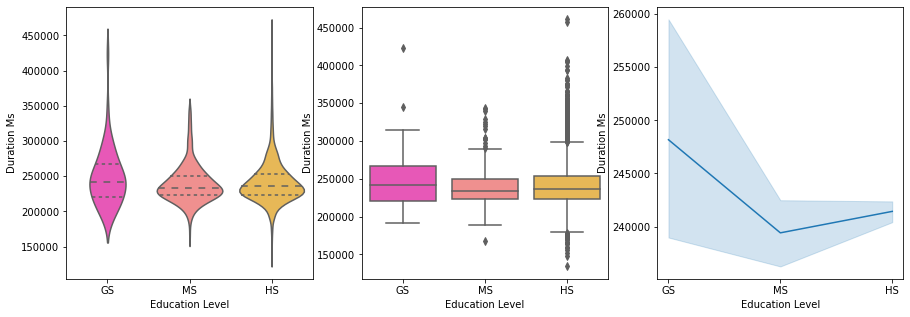

In [6]:
for column in graphData.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    for (x, y) in pairwise(graphData['Education Level'].cat.categories):
        t = stats.ttest_ind(graphData[graphData['Education Level'] == x][column], graphData[graphData['Education Level'] == y][column])
        if (t.pvalue <= .005):
            print('***' + str(x) + ' -> ' + str(y) + ': ' + str(t))
        else:
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))
    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Education Level', y = column, inner = 'quartile', data = graphData, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Education Level', y = column, data = graphData, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Education Level', y = column, data = graphData, ax = axs[2], palette='spring')
    plt.show();

### Age

In [7]:
graphData = data.groupby(['Age', 'User Id'], observed = True).agg('mean').reset_index()
graphData

,Age,User Id,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration Ms
0,6,2484832,0.499617,0.765585,-6.209437,0.075984,0.137798,0.068086,0.212639,0.523440,129.411800,219954.421550
1,6,2921901,0.392287,0.667716,-9.636278,0.079394,0.266832,0.426469,0.225055,0.340597,122.205608,241957.427850
2,6,4574715,0.460771,0.462643,-13.063191,0.060936,0.472033,0.372473,0.188406,0.333130,116.793197,283232.232249
3,6,4906926,0.525892,0.777280,-7.029003,0.093502,0.127836,0.185103,0.231729,0.511034,127.546852,225409.132419
4,6,4938859,0.521086,0.728044,-8.176723,0.067876,0.159518,0.165438,0.238414,0.516767,122.966620,272246.714222
...,...,...,...,...,...,...,...,...,...,...,...,...
3407,17,50061396,0.462436,0.817509,-6.474455,0.122220,0.082181,0.385049,0.258118,0.272242,119.945636,224684.745455
3408,17,50064945,0.507060,0.653457,-8.352348,0.047765,0.268063,0.197032,0.219584,0.440143,118.407931,224084.528736
3409,17,50069619,0.451071,0.872442,-5.356760,0.090707,0.042539,0.108566,0.214313,0.512370,135.749433,194057.670500
3410,17,50073544,0.361878,0.811293,-7.415683,0.087080,0.095022,0.143690,0.148729,0.386059,120.194195,260074.536585


#### Just significant

16 -> 17: Ttest_indResult(statistic=3.019715227621059, pvalue=0.00255493077251005)


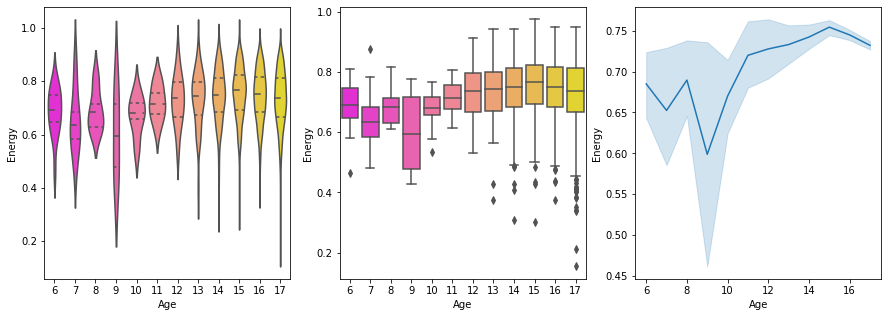

16 -> 17: Ttest_indResult(statistic=4.167675219313376, pvalue=3.178572205248733e-05)


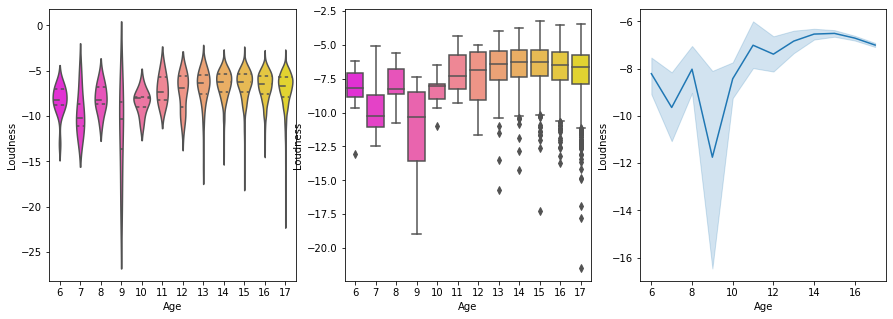

16 -> 17: Ttest_indResult(statistic=-3.336640431963423, pvalue=0.000859999269156199)


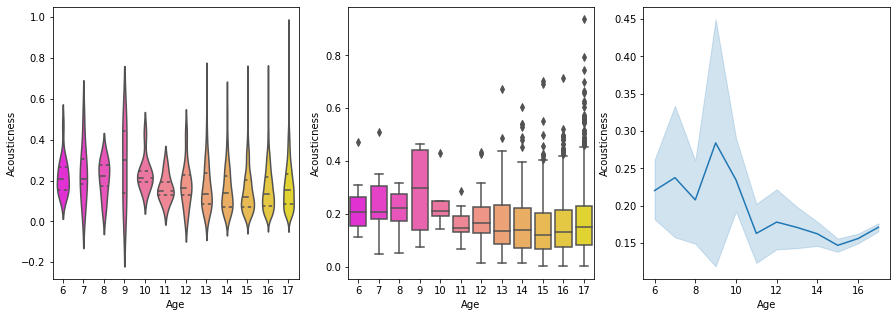

6 -> 7: Ttest_indResult(statistic=-3.38837318364929, pvalue=0.00242591300824333)
16 -> 17: Ttest_indResult(statistic=-3.9420834878513693, pvalue=8.292584878936084e-05)


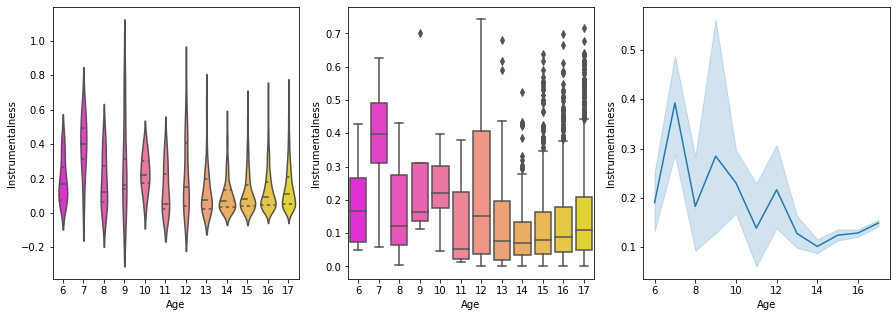

In [8]:
for column in graphData.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue
        
    significant = False
    for (x, y) in pairwise(sorted(graphData['Age'].unique())):
        t = stats.ttest_ind(graphData[graphData['Age'] == x][column], graphData[graphData['Age'] == y][column])
        if (t.pvalue <= .005):
            significant = True
            
    if (significant == False):
        continue

    for (x, y) in pairwise(sorted(graphData['Age'].unique())):
        t = stats.ttest_ind(graphData[graphData['Age'] == x][column], graphData[graphData['Age'] == y][column])
        if (t.pvalue <= .005):
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))
    
    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Age', y = column, inner = 'quartile', data = graphData, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Age', y = column, data = graphData, ax = axs[2], palette='spring')
    plt.show();

#### All

6 -> 7: Ttest_indResult(statistic=1.744383325141236, pvalue=0.0938879990257411)
7 -> 8: Ttest_indResult(statistic=-1.7815021795136936, pvalue=0.093818944333919)
8 -> 9: Ttest_indResult(statistic=-0.260458701974899, pvalue=0.7993212197679286)
9 -> 10: Ttest_indResult(statistic=0.0005868318931982014, pvalue=0.9995422831737361)
10 -> 11: Ttest_indResult(statistic=-1.0360825558242774, pvalue=0.3155698132610736)
11 -> 12: Ttest_indResult(statistic=0.8897123890937814, pvalue=0.38047307386826346)
12 -> 13: Ttest_indResult(statistic=-0.08029266608828389, pvalue=0.9361808094564222)
13 -> 14: Ttest_indResult(statistic=0.7144183341175773, pvalue=0.4756194543656945)
14 -> 15: Ttest_indResult(statistic=2.6642175403593726, pvalue=0.007899940636286068)
15 -> 16: Ttest_indResult(statistic=0.04640480891460444, pvalue=0.9629940605215948)
16 -> 17: Ttest_indResult(statistic=0.45729058771321823, pvalue=0.6475007112589736)


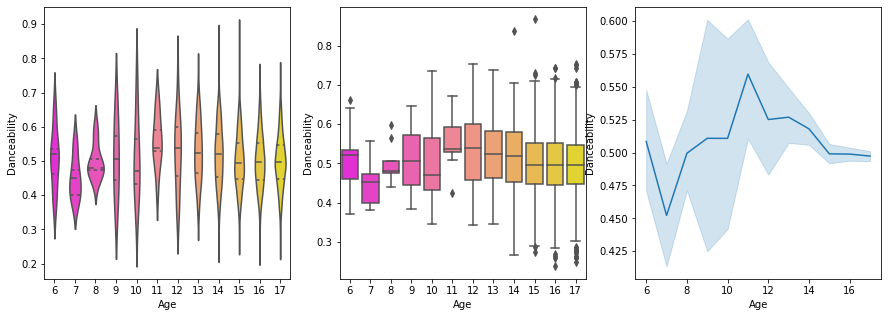

6 -> 7: Ttest_indResult(statistic=0.7930212031463074, pvalue=0.43553555933861365)
7 -> 8: Ttest_indResult(statistic=-0.7844024829107323, pvalue=0.44426295296421625)
8 -> 9: Ttest_indResult(statistic=1.4004852819022482, pvalue=0.18893906436631303)
9 -> 10: Ttest_indResult(statistic=-1.1131252857187082, pvalue=0.2893878433540993)
10 -> 11: Ttest_indResult(statistic=-1.5182249351752992, pvalue=0.14846835965254865)
11 -> 12: Ttest_indResult(statistic=-0.23239331778629826, pvalue=0.8177599809370407)
12 -> 13: Ttest_indResult(statistic=-0.2207729624307511, pvalue=0.8257638035865813)
13 -> 14: Ttest_indResult(statistic=-0.6248969936804596, pvalue=0.5325952427776077)
14 -> 15: Ttest_indResult(statistic=-1.4105984201128707, pvalue=0.1588210152682261)
15 -> 16: Ttest_indResult(statistic=1.7404844250037916, pvalue=0.081988344970087)
***16 -> 17: Ttest_indResult(statistic=3.019715227621059, pvalue=0.00255493077251005)


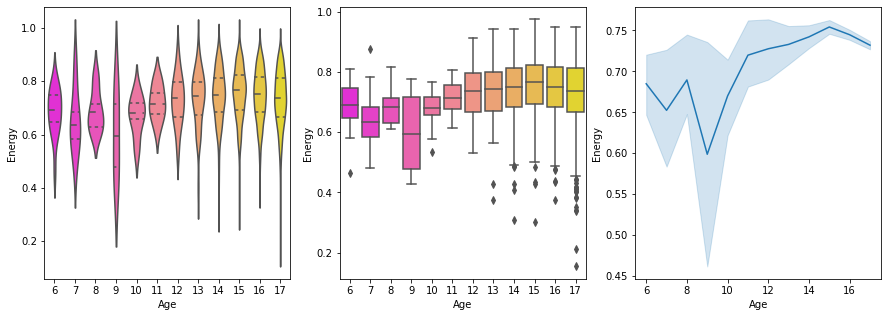

6 -> 7: Ttest_indResult(statistic=1.8062880162480675, pvalue=0.08343040908606214)
7 -> 8: Ttest_indResult(statistic=-1.6904718945899004, pvalue=0.11032247966659935)
8 -> 9: Ttest_indResult(statistic=2.060274661590277, pvalue=0.06383513856370673)
9 -> 10: Ttest_indResult(statistic=-1.8897407650887421, pvalue=0.08541980660072515)
10 -> 11: Ttest_indResult(statistic=-2.078096241237626, pvalue=0.05415550682150884)
11 -> 12: Ttest_indResult(statistic=0.5061054268455817, pvalue=0.6163630810775934)
12 -> 13: Ttest_indResult(statistic=-1.1179998361726795, pvalue=0.26650986617921185)
13 -> 14: Ttest_indResult(statistic=-1.1949340226723686, pvalue=0.23321865483250165)
14 -> 15: Ttest_indResult(statistic=-0.2069044564000841, pvalue=0.8361465068013605)
15 -> 16: Ttest_indResult(statistic=2.2369914395970323, pvalue=0.025439962866210385)
***16 -> 17: Ttest_indResult(statistic=4.167675219313376, pvalue=3.178572205248733e-05)


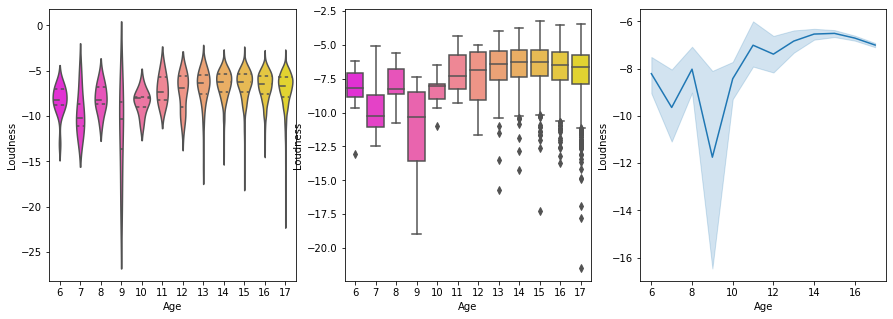

6 -> 7: Ttest_indResult(statistic=0.26337997844867556, pvalue=0.7945058226377131)
7 -> 8: Ttest_indResult(statistic=0.7512292039787409, pvalue=0.46342174170747163)
8 -> 9: Ttest_indResult(statistic=0.3689896231859993, pvalue=0.7191393769282253)
9 -> 10: Ttest_indResult(statistic=-0.33986045843795415, pvalue=0.7403624729447047)
10 -> 11: Ttest_indResult(statistic=-0.5825110043078042, pvalue=0.5683414952918318)
11 -> 12: Ttest_indResult(statistic=-0.6574099694043304, pvalue=0.5157692677360359)
12 -> 13: Ttest_indResult(statistic=0.9033735044767589, pvalue=0.3687128698759792)
13 -> 14: Ttest_indResult(statistic=1.6774565543785545, pvalue=0.09467370556201252)
14 -> 15: Ttest_indResult(statistic=-0.6512666813293028, pvalue=0.5150946991364991)
15 -> 16: Ttest_indResult(statistic=-0.0860389992969792, pvalue=0.9314474179596715)
16 -> 17: Ttest_indResult(statistic=-0.25542390222634903, pvalue=0.7984160796328924)


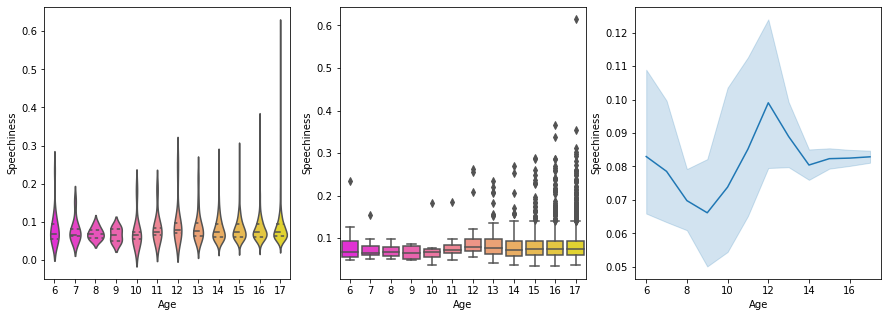

6 -> 7: Ttest_indResult(statistic=-0.3856734091075287, pvalue=0.7031359764988486)
7 -> 8: Ttest_indResult(statistic=0.538439075578045, pvalue=0.597685776024103)
8 -> 9: Ttest_indResult(statistic=-0.9990203861958462, pvalue=0.3392542401765247)
9 -> 10: Ttest_indResult(statistic=0.6697924708473566, pvalue=0.5168034376160087)
10 -> 11: Ttest_indResult(statistic=2.0713242116118735, pvalue=0.054857574458704324)
11 -> 12: Ttest_indResult(statistic=-0.3960411777900089, pvalue=0.6947874594834502)
12 -> 13: Ttest_indResult(statistic=0.2533362604333636, pvalue=0.8005798309432336)
13 -> 14: Ttest_indResult(statistic=0.5138172936734834, pvalue=0.6078229395641119)
14 -> 15: Ttest_indResult(statistic=1.669447754295152, pvalue=0.09548960969380227)
15 -> 16: Ttest_indResult(statistic=-1.5815039060423286, pvalue=0.11398323343401263)
***16 -> 17: Ttest_indResult(statistic=-3.336640431963423, pvalue=0.000859999269156199)


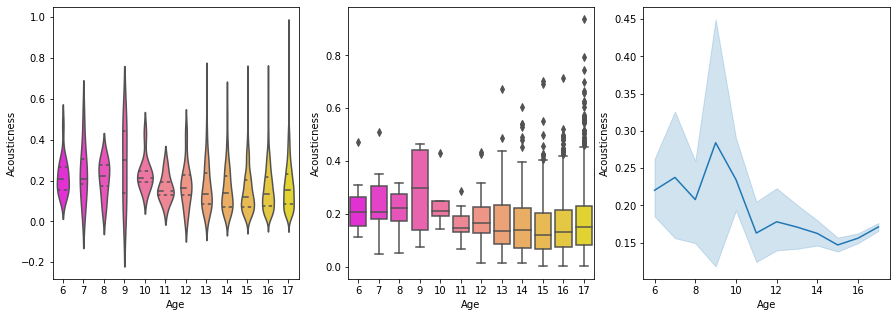

***6 -> 7: Ttest_indResult(statistic=-3.38837318364929, pvalue=0.00242591300824333)
7 -> 8: Ttest_indResult(statistic=2.7108231853552662, pvalue=0.015426090862791475)
8 -> 9: Ttest_indResult(statistic=-0.8585490735813098, pvalue=0.4089080497676809)
9 -> 10: Ttest_indResult(statistic=0.5252297528538573, pvalue=0.6098468502719692)
10 -> 11: Ttest_indResult(statistic=1.561145636516882, pvalue=0.13804913342695077)
11 -> 12: Ttest_indResult(statistic=-1.014007141417341, pvalue=0.31842867764451055)
12 -> 13: Ttest_indResult(statistic=2.2542845085163736, pvalue=0.026578214047248663)
13 -> 14: Ttest_indResult(statistic=1.620710889631941, pvalue=0.10631071286581766)
14 -> 15: Ttest_indResult(statistic=-2.2375196776493493, pvalue=0.025575999931067024)
15 -> 16: Ttest_indResult(statistic=-0.658129801653918, pvalue=0.5105602920439594)
***16 -> 17: Ttest_indResult(statistic=-3.9420834878513693, pvalue=8.292584878936084e-05)


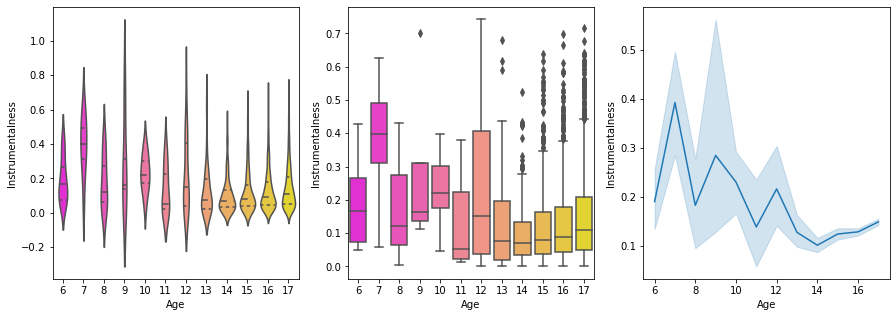

6 -> 7: Ttest_indResult(statistic=-0.26153242104665014, pvalue=0.7959133492475856)
7 -> 8: Ttest_indResult(statistic=0.32803059430516884, pvalue=0.7471420254800344)
8 -> 9: Ttest_indResult(statistic=1.2327424811083618, pvalue=0.2433687387120183)
9 -> 10: Ttest_indResult(statistic=0.28061255603015567, pvalue=0.7842150699107135)
10 -> 11: Ttest_indResult(statistic=-0.37076323871847006, pvalue=0.7156768832055809)
11 -> 12: Ttest_indResult(statistic=-1.7336295263382548, pvalue=0.09292087121678184)
12 -> 13: Ttest_indResult(statistic=1.500097367459699, pvalue=0.13705077865140297)
13 -> 14: Ttest_indResult(statistic=-0.8378557092662187, pvalue=0.40289330291247416)
14 -> 15: Ttest_indResult(statistic=0.45878709513603794, pvalue=0.6465338807205787)
15 -> 16: Ttest_indResult(statistic=-0.5837969180111455, pvalue=0.5594487010510107)
16 -> 17: Ttest_indResult(statistic=0.95383670417008, pvalue=0.3402556971218449)


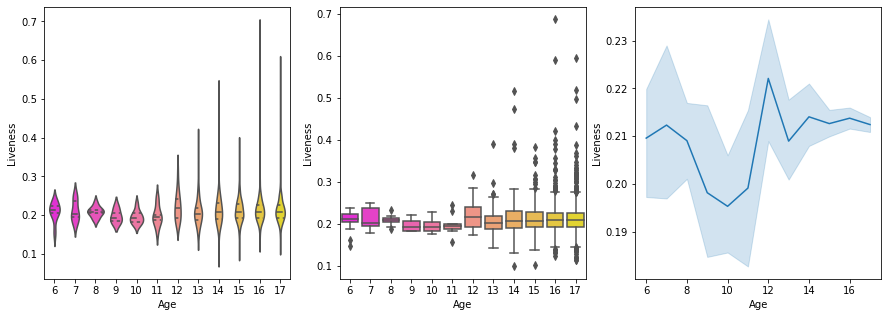

6 -> 7: Ttest_indResult(statistic=2.9192741110391043, pvalue=0.007511674490275949)
7 -> 8: Ttest_indResult(statistic=-3.0076357182956435, pvalue=0.008345482570502289)
8 -> 9: Ttest_indResult(statistic=-0.43348105883099236, pvalue=0.6730436667845032)
9 -> 10: Ttest_indResult(statistic=0.1692347623668423, pvalue=0.8686839803823001)
10 -> 11: Ttest_indResult(statistic=-1.0591998409114358, pvalue=0.30523794283466377)
11 -> 12: Ttest_indResult(statistic=1.4621014254343208, pvalue=0.15377789616286572)
12 -> 13: Ttest_indResult(statistic=-0.6343007842726739, pvalue=0.527475910005861)
13 -> 14: Ttest_indResult(statistic=0.7743977237939884, pvalue=0.43941024189605615)
14 -> 15: Ttest_indResult(statistic=1.5600790343557105, pvalue=0.1192071460074064)
15 -> 16: Ttest_indResult(statistic=0.4815650208940096, pvalue=0.6301884068494739)
16 -> 17: Ttest_indResult(statistic=1.2172917698013843, pvalue=0.22360459660261628)


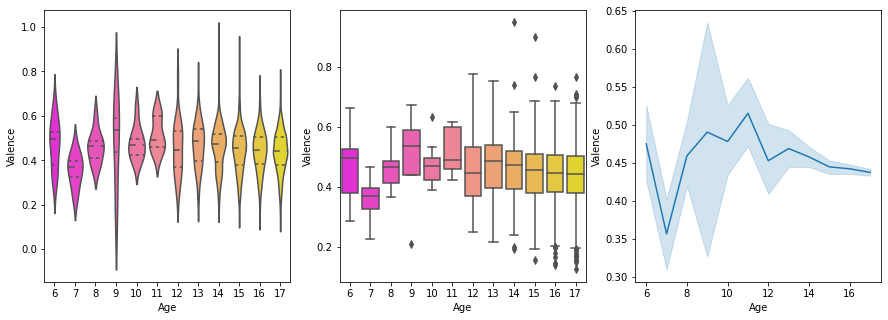

6 -> 7: Ttest_indResult(statistic=1.4089011834307825, pvalue=0.17168947184242656)
7 -> 8: Ttest_indResult(statistic=-3.032751325543465, pvalue=0.00791912865377046)
8 -> 9: Ttest_indResult(statistic=1.9471637521013403, pvalue=0.07749096648188944)
9 -> 10: Ttest_indResult(statistic=-0.18573408138275024, pvalue=0.856033920056877)
10 -> 11: Ttest_indResult(statistic=-1.0703734130059699, pvalue=0.3003331459949078)
11 -> 12: Ttest_indResult(statistic=-0.24566439483167501, pvalue=0.8075612462283754)
12 -> 13: Ttest_indResult(statistic=-0.3641679650405592, pvalue=0.7165773891309877)
13 -> 14: Ttest_indResult(statistic=-0.40456425713425376, pvalue=0.6861356471404632)
14 -> 15: Ttest_indResult(statistic=-2.3166074284029117, pvalue=0.020821872434199216)
15 -> 16: Ttest_indResult(statistic=1.421243260596299, pvalue=0.15546332243668706)
16 -> 17: Ttest_indResult(statistic=2.5269393363692934, pvalue=0.011565465476397597)


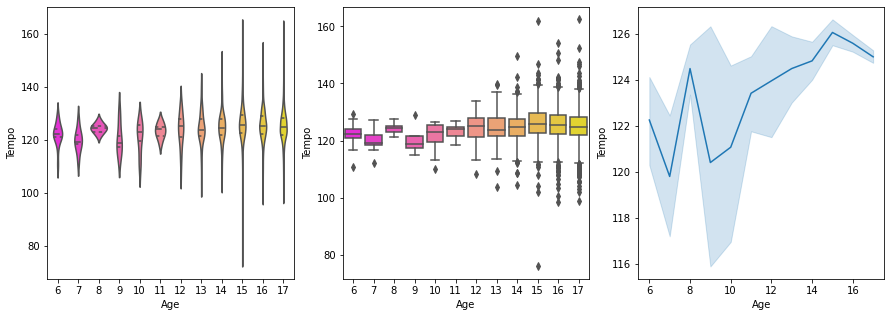

6 -> 7: Ttest_indResult(statistic=-0.8239393252412687, pvalue=0.4180872676700387)
7 -> 8: Ttest_indResult(statistic=0.8903911913551175, pvalue=0.3864488870808864)
8 -> 9: Ttest_indResult(statistic=-1.1379749814369964, pvalue=0.27931008028109117)
9 -> 10: Ttest_indResult(statistic=1.0696926757207774, pvalue=0.3076686143447401)
10 -> 11: Ttest_indResult(statistic=0.7241529709068856, pvalue=0.47942746039263806)
11 -> 12: Ttest_indResult(statistic=-1.244957241170147, pvalue=0.22247689762835351)
12 -> 13: Ttest_indResult(statistic=1.4181869696684481, pvalue=0.15955168419487725)
13 -> 14: Ttest_indResult(statistic=0.5628354844593713, pvalue=0.5740394847320751)
14 -> 15: Ttest_indResult(statistic=-0.48178637763570303, pvalue=0.6301129517993043)
15 -> 16: Ttest_indResult(statistic=-0.881348638920326, pvalue=0.37827674046928894)
16 -> 17: Ttest_indResult(statistic=-1.9240186961066752, pvalue=0.054462169037899036)


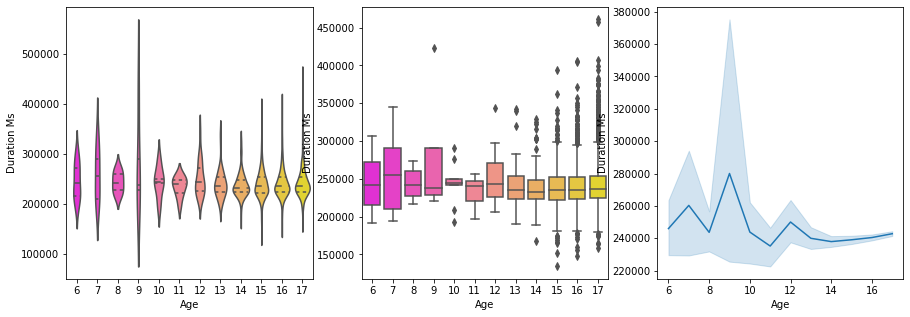

In [9]:
for column in graphData.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue
        
    for (x, y) in pairwise(sorted(graphData['Age'].unique())):
        t = stats.ttest_ind(graphData[graphData['Age'] == x][column], graphData[graphData['Age'] == y][column])
        if (t.pvalue <= .005):
            print('***' + str(x) + ' -> ' + str(y) + ': ' + str(t))
        else:
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))
            
    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Age', y = column, inner = 'quartile', data = graphData, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Age', y = column, data = graphData, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Age', y = column, data = graphData, ax = axs[2], palette='spring')
    plt.show();